In [1]:
import pandas as pd
import os
os.chdir(r'D:\analytixlabs\DataSets')
os.getcwd()

'D:\\analytixlabs\\DataSets'

In [2]:
stores = pd.read_csv("stores.csv") 
stores.shape

(32, 15)

# User Defined Functions on a DataFrame

In [1]:
def square(x):
    return x**2

In [2]:
l1 = [3,5,3,8,7,6,5,9,10,2,3,5,25]

In [3]:
for ele in l1:
    print(square(ele))

9
25
9
64
49
36
25
81
100
4
9
25
625


In [4]:
[square(ele) for ele in l1]  #list comprehension

# taking a function and applying it on the entire data structure

[9, 25, 9, 64, 49, 36, 25, 81, 100, 4, 9, 25, 625]

In [5]:
import pandas as pd
# For all the 1d data structures, we can easily use loops
# on 2d DS, loop is impractical. so we need some other mechanism
#    - a function that can take another function and its args and apply it on the DataFrame

# so ---> Series.apply() and DataFrame.apply()
# apply() takes a funciton and their args and applies it on the DF or Series

sample_data = {
    "col1":[10,3,56,2,10],
    "col2":[4,32,6,2,20],
    "col3":[5,23,5,4,6]    
}
sample_data = pd.DataFrame(sample_data)

In [6]:
sample_data

,col1,col2,col3
0,10,4,5
1,3,32,23
2,56,6,5
3,2,2,4
4,10,20,6


In [7]:
# Target : take the funciton square() and apply it on sample_data
# how to do it?
# we'll make use Series.apply()  ---> DF.apply()
sample_data.apply(square)      # we are not calling function

# sample_data.apply(square()) # incorrect!!! 

# - The function named "square" got applied to each and every column
# - the square function has one argument x and that x is being supplied by the columns
#       square(x)

,col1,col2,col3
0,100,16,25
1,9,1024,529
2,3136,36,25
3,4,4,16
4,100,400,36


In [8]:
def power(x,p=1):
    return x ** p

In [9]:
power(x=2,p=5)

32

In [10]:
sample_data.apply(power, p=3)

#If a function has n number of arguments, at least one argument will be supplied by the data frame
#The remaining you need to mention it explicitly using keywords 
#No, it's not like first argument. It's like one of the arguments present here, 


,col1,col2,col3
0,1000,64,125
1,27,32768,12167
2,175616,216,125
3,8,8,64
4,1000,8000,216


In [11]:
sample_data[["col1","col3"]].apply(power, p=3) # applying functions on specific columns

,col1,col3
0,1000,125
1,27,12167
2,175616,125
3,8,64
4,1000,216


In [12]:
sample_data.iloc[:,[0,2]].apply(power, p=3) #using iloc

,col1,col3
0,1000,125
1,27,12167
2,175616,125
3,8,64
4,1000,216


## Create an user defined function for calculating count, nmiss, sum, avg, 0%, 1%, 5%, 10%, 25%, 50%, 75%, 90%, 95%, 99%, 100% for a DF/Series

In [13]:
ser1 = pd.Series(l1)
ser1

0      3
1      5
2      3
3      8
4      7
5      6
6      5
7      9
8     10
9      2
10     3
11     5
12    25
dtype: int64

In [15]:
# ser1
# calculate count, nmiss, sum, avg, std
ser1.count()
len(ser1) - ser1.count()
ser1.sum()
ser1.mean()
ser1.std()

5.94418483337567

In [14]:
ser1.count()

13

In [20]:
ser1.isnull().sum()
ser1.shape[0]-ser1.count()
len(ser1) - ser1.count()

0

In [15]:
ser1.sum()

91

In [22]:
ser1.mean()

7.0

In [21]:
ser1.std()

5.94418483337567

In [23]:
# ser1
# 0%, 1%, 5%, 10%, 25%, 50%, 75%, 90%, 95%, 99%, 100% for a DF/Series
q = ser1.quantile([0,0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99,1])
q.index = ['0%', '1%', '5%', '10%', 'Q1', 'median', 'Q3', '90%', '95%', '99%', '100%']
q

0%         2.00
1%         2.12
5%         2.60
10%        3.00
Q1         3.00
median     5.00
Q3         8.00
90%        9.80
95%       16.00
99%       23.20
100%      25.00
dtype: float64

In [31]:
def cont_univariate(x):
    import pandas as pd
    x = pd.Series(x)
    n = x.count()
    nmiss = len(x) - n
    Sum = x.sum()
    Avg = x.mean()
    stdev = x.std()
    q = x.quantile([0,0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99,1])
    q.index = ['0%', '1%', '5%', '10%', 'Q1', 'median', 'Q3', '90%', '95%', '99%', '100%']
    
    r1 = pd.Series([n,nmiss,Sum,Avg,stdev],index = ["counts","nmiss","SUM","AVG","STD_DEV"])
    
    res = pd.concat([r1,q],axis=0)
    
    return res

In [32]:
cont_univariate(ser1)

counts     13.000000
nmiss       0.000000
SUM        91.000000
AVG         7.000000
STD_DEV     5.944185
0%          2.000000
1%          2.120000
5%          2.600000
10%         3.000000
Q1          3.000000
median      5.000000
Q3          8.000000
90%         9.800000
95%        16.000000
99%        23.200000
100%       25.000000
dtype: float64

In [35]:
l2 = [12,34,54,21,35,64,23]
cont_univariate(l2)

counts       7.000000
nmiss        0.000000
SUM        243.000000
AVG         34.714286
STD_DEV     18.580584
0%          12.000000
1%          12.540000
5%          14.700000
10%         17.400000
Q1          22.000000
median      34.000000
Q3          44.500000
90%         58.000000
95%         61.000000
99%         63.400000
100%        64.000000
dtype: float64

In [40]:
stores.head()

,StoreCode,StoreName,StoreType,Location,OperatingCost,Staff_Cnt,TotalSales,Total_Customers,AcqCostPercust,BasketSize,ProfitPercust,OwnStore,OnlinePresence,Tenure,StoreSegment
0,STR101,Electronics Zone,Electronincs,Delhi,21.0,60,160.0,110,3.90,2.620,16.46,0,1,4,4
1,STR102,Apparel Zone,Apparel,Delhi,21.0,60,160.0,110,3.90,2.875,17.02,0,1,4,4
2,STR103,Super Bazar,Super Market,Delhi,22.8,40,108.0,93,3.85,2.320,18.61,1,1,4,1
3,STR104,Super Market,Super Market,Delhi,21.4,60,258.0,110,3.08,3.215,19.44,1,0,3,1
4,STR105,Central Store,Super Market,Delhi,18.7,80,360.0,175,3.15,3.440,17.02,0,0,3,2


### Above calculations is applicable on continous numericals only, not all numerical cols

In [39]:
cont_vars = stores._get_numeric_data() 
cont_vars 

# ignoring object and Date columns, it gives numbers
# not all numerics are continuous

,OperatingCost,Staff_Cnt,TotalSales,Total_Customers,AcqCostPercust,BasketSize,ProfitPercust,OwnStore,OnlinePresence,Tenure,StoreSegment
0,21.0,60,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,60,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,40,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,60,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,80,360.0,175,3.15,3.440,17.02,0,0,3,2
5,18.1,60,225.0,105,2.76,3.460,20.22,1,0,3,1
6,14.3,80,360.0,245,3.21,3.570,15.84,0,0,3,4
7,24.4,40,146.7,62,3.69,3.190,20.00,1,0,4,2
8,22.8,40,140.8,95,3.92,3.150,22.90,1,0,4,2
9,19.2,60,167.6,123,3.92,3.440,18.30,1,0,4,4


In [46]:
except_these_cols = ['OwnStore','OnlinePresence', 'StoreSegment']
cont_var_list = list(cont_vars.columns.difference(except_these_cols))
print(cont_var_list)  # printing list of only continous numeric vols

['AcqCostPercust', 'BasketSize', 'OperatingCost', 'ProfitPercust', 'Staff_Cnt', 'Tenure', 'TotalSales', 'Total_Customers']


In [47]:
stores.columns

Index(['StoreCode', 'StoreName', 'StoreType', 'Location', 'OperatingCost',
       'Staff_Cnt', 'TotalSales', 'Total_Customers', 'AcqCostPercust',
       'BasketSize', 'ProfitPercust', 'OwnStore', 'OnlinePresence', 'Tenure',
       'StoreSegment'],
      dtype='object')

### Date itself is not a categorical nor continuous, but the things that you extract from a date, they become continuous or categorical

In [49]:
cont_stores = stores[cont_var_list]
cont_stores # printing only continous numeric vols

,AcqCostPercust,BasketSize,OperatingCost,ProfitPercust,Staff_Cnt,Tenure,TotalSales,Total_Customers
0,3.90,2.620,21.0,16.46,60,4,160.0,110
1,3.90,2.875,21.0,17.02,60,4,160.0,110
2,3.85,2.320,22.8,18.61,40,4,108.0,93
3,3.08,3.215,21.4,19.44,60,3,258.0,110
4,3.15,3.440,18.7,17.02,80,3,360.0,175
5,2.76,3.460,18.1,20.22,60,3,225.0,105
6,3.21,3.570,14.3,15.84,80,3,360.0,245
7,3.69,3.190,24.4,20.00,40,4,146.7,62
8,3.92,3.150,22.8,22.90,40,4,140.8,95
9,3.92,3.440,19.2,18.30,60,4,167.6,123


In [55]:
summary_report = cont_stores.apply(cont_univariate)
summary_report

,AcqCostPercust,BasketSize,OperatingCost,ProfitPercust,Staff_Cnt,Tenure,TotalSales,Total_Customers
counts,29.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
nmiss,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SUM,105.880000,102.952000,642.900000,571.160000,1980.000000,118.000000,7383.100000,4694.000000
AVG,3.651034,3.217250,20.090625,17.848750,61.875000,3.687500,230.721875,146.687500
STD_DEV,0.532664,0.978457,6.026948,1.786943,17.859216,0.737804,123.938694,68.562868
0%,2.760000,1.513000,10.400000,14.500000,40.000000,3.000000,71.100000,52.000000
1%,2.760000,1.544620,10.400000,14.531000,40.000000,3.000000,72.526000,55.100000
5%,2.828000,1.736000,11.995000,15.045500,40.000000,3.000000,77.350000,63.650000
10%,2.986000,1.955500,14.340000,15.534000,40.000000,3.000000,80.610000,66.000000
Q1,3.150000,2.581250,15.425000,16.892500,40.000000,3.000000,120.825000,96.500000


In [58]:
summary_report = cont_stores.apply(cont_univariate).T    #.T means transpose
summary_report

,counts,nmiss,SUM,AVG,STD_DEV,0%,1%,5%,10%,Q1,median,Q3,90%,95%,99%,100%
AcqCostPercust,29.0,3.0,105.880,3.651034,0.532664,2.760,2.76000,2.8280,2.9860,3.15000,3.730,3.92,4.2200,4.34600,4.79000,4.930
BasketSize,32.0,0.0,102.952,3.217250,0.978457,1.513,1.54462,1.7360,1.9555,2.58125,3.325,3.61,4.0475,5.29275,5.39951,5.424
OperatingCost,32.0,0.0,642.900,20.090625,6.026948,10.400,10.40000,11.9950,14.3400,15.42500,19.200,22.80,30.0900,31.30000,33.43500,33.900
ProfitPercust,32.0,0.0,571.160,17.848750,1.786943,14.500,14.53100,15.0455,15.5340,16.89250,17.710,18.90,19.9900,20.10450,22.06920,22.900
Staff_Cnt,32.0,0.0,1980.000,61.875000,17.859216,40.000,40.00000,40.0000,40.0000,40.00000,60.000,80.00,80.0000,80.00000,80.00000,80.000
Tenure,32.0,0.0,118.000,3.687500,0.737804,3.000,3.00000,3.0000,3.0000,3.00000,4.000,4.00,5.0000,5.00000,5.00000,5.000
TotalSales,32.0,0.0,7383.100,230.721875,123.938694,71.100,72.52600,77.3500,80.6100,120.82500,196.300,326.00,396.0000,449.00000,468.28000,472.000
Total_Customers,32.0,0.0,4694.000,146.687500,68.562868,52.000,55.10000,63.6500,66.0000,96.50000,123.000,180.00,243.5000,253.55000,312.99000,335.000


In [59]:
summary_report.counts #extracting becomes easy due to transpose

AcqCostPercust     29.0
BasketSize         32.0
OperatingCost      32.0
ProfitPercust      32.0
Staff_Cnt          32.0
Tenure             32.0
TotalSales         32.0
Total_Customers    32.0
Name: counts, dtype: float64

## lambda functions

- lambda functions : anon functions
- used for functions where there is single line of code
> `lambda input:return`
- E.g. `lambda x,y:x+y`
- any function with single line of code, can be written in form of lambda

In [60]:
def square(x):
    return x**2

def power(x,p=1):
    return x**p

In [61]:
sample_data.apply(square)

,col1,col2,col3
0,100,16,25
1,9,1024,529
2,3136,36,25
3,4,4,16
4,100,400,36


In [62]:
# instad of creating a function called square, without creating it we can use it as 
# lambda

sample_data.apply(lambda x:x**2)

,col1,col2,col3
0,100,16,25
1,9,1024,529
2,3136,36,25
3,4,4,16
4,100,400,36


In [46]:
stores.StoreType.value_counts()

Apparel         12
Super Market    12
Electronincs     8
Name: StoreType, dtype: int64

In [47]:
stores.StoreSegment.value_counts()

4    12
2    10
1     7
3     3
Name: StoreSegment, dtype: int64

In [50]:
stores.groupby(by=["StoreType","StoreSegment"])[["StoreType"]].count()

StoreType
StoreType    StoreSegment           
Apparel      1                     3
             2                     2
             3                     1
             4                     6
Electronincs 2                     4
             4                     4
Super Market 1                     4
             2                     4
             3                     2
             4                     2

In [57]:
pd.crosstab(stores.StoreType, stores.StoreSegment)

StoreSegment,1,2,3,4
StoreType,,,,
Apparel,3,2,1,6
Electronincs,0,4,0,4
Super Market,4,4,2,2


# Visualizations

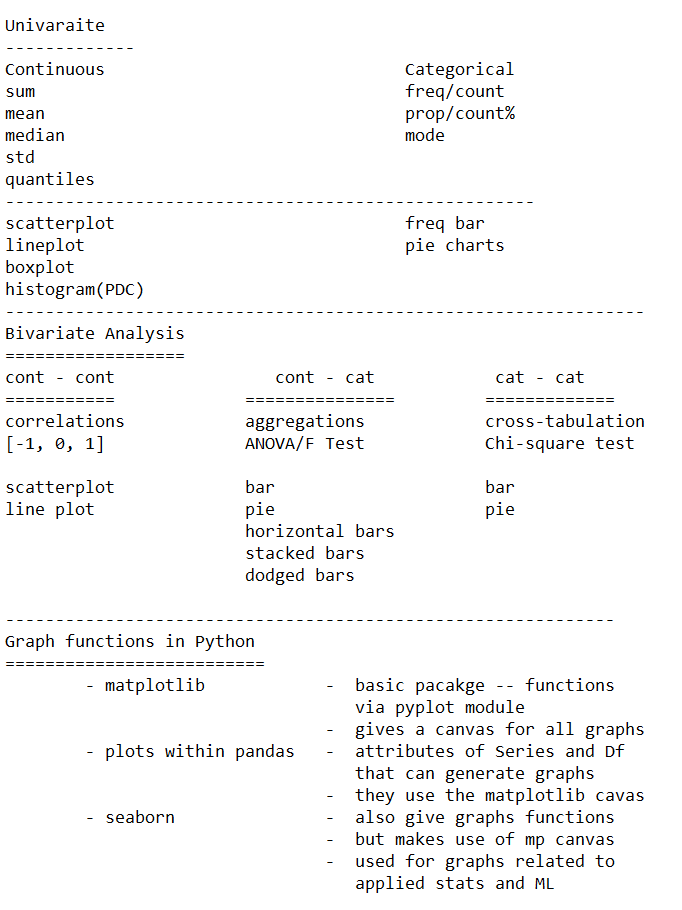

In [5]:
import matplotlib as mp
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
# every time we generate a graph, it auto displayed in ipynb
#   if not, we'll have to use plt.show()

In [3]:
stores.TotalSales

0     160.0
1     160.0
2     108.0
3     258.0
4     360.0
5     225.0
6     360.0
7     146.7
8     140.8
9     167.6
10    167.6
11    275.8
12    275.8
13    275.8
14    472.0
15    460.0
16    440.0
17     78.7
18     75.7
19     71.1
20    120.1
21    318.0
22    304.0
23    350.0
24    400.0
25     79.0
26    120.3
27     95.1
28    351.0
29    145.0
30    301.0
31    121.0
Name: TotalSales, dtype: float64

(array([6., 6., 4., 1., 1., 5., 3., 2., 1., 3.]),
 array([ 71.1 , 111.19, 151.28, 191.37, 231.46, 271.55, 311.64, 351.73,
        391.82, 431.91, 472.  ]),
 <a list of 10 Patch objects>)

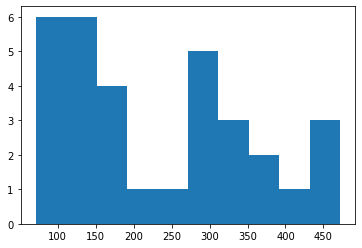

In [7]:
# histograms
# univariate

# 1, using mp
plt.hist(stores.TotalSales)

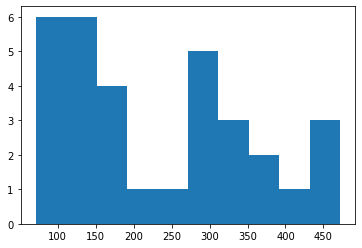

In [19]:
plt.hist(stores.TotalSales)
plt.show()

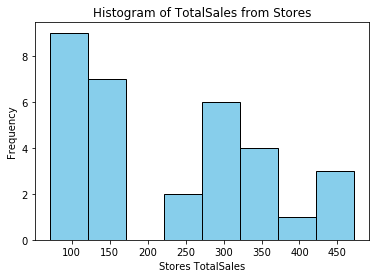

In [22]:
plt.hist(stores.TotalSales,bins=8, color = "skyblue", edgecolor ="black")  #bins = 8 gives 8 buckets 
plt.xlabel("Stores TotalSales")
plt.ylabel("Frequency")
plt.title("Histogram of TotalSales from Stores")
plt.show()

In [ ]:
# pandas
# Df.plot() or Series.plot()
#    -   kind = ""   # mandatory argument
#              mention the function name from mp.pyplot that can draw a graph
#    - .. other args related to a grpah that we generated
#    - same like

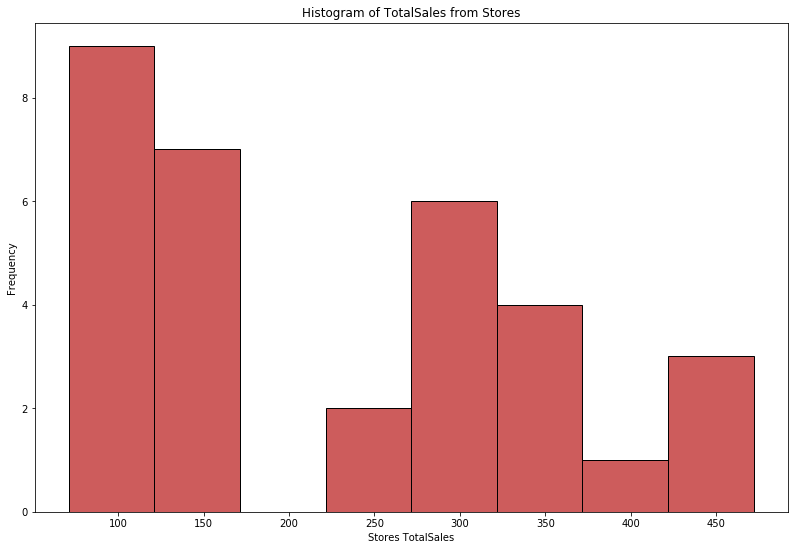

In [76]:
# 2, using pandas

stores.TotalSales.plot(kind = "hist", bins = 8, color = "indianred", edgecolor="black" , figsize=(13.5, 9))
plt.xlabel("Stores TotalSales")
plt.title("Histogram of TotalSales from Stores")
plt.show()

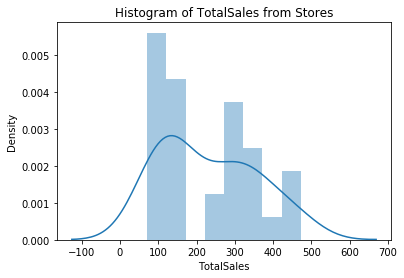

In [24]:
# 3. using seaborn
# sns.distplot()  --> histogram + distribution plot

sns.distplot(stores.TotalSales,bins=8)
plt.ylabel("Density")
plt.title("Histogram of TotalSales from Stores")
plt.show()

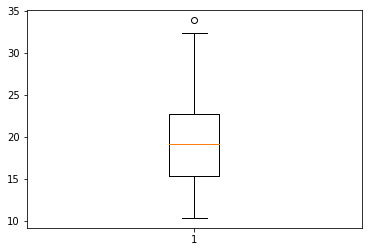

In [25]:
# Boxplots
# 1. plt

plt.boxplot(stores.OperatingCost)
plt.show()

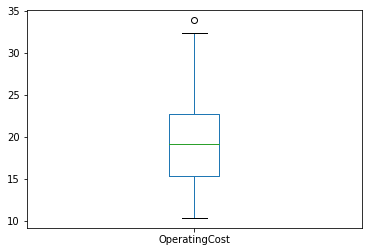

In [28]:
# 2, using pandas
stores.OperatingCost.plot(kind = "box") # box

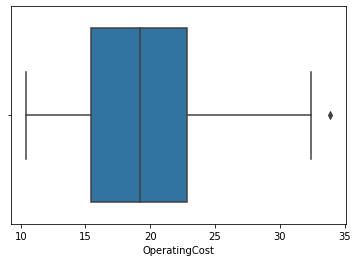

In [29]:
# 3, using seaborn
sns.boxplot(stores.OperatingCost)
plt.show()

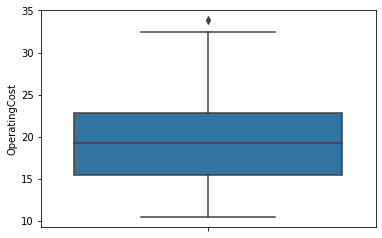

In [30]:
sns.boxplot(stores.OperatingCost,orient='v') # orient = 'v' (vertical)
plt.show()

In [88]:
# Task
# What is a histogram?
# What is Probability Distributions
# What are the common Probability Distributions? 

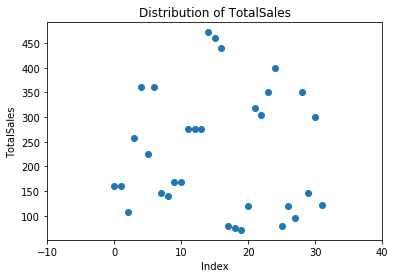

In [14]:
# Scatter plots
# x,y plotting
#       two Series/arrays of same size.
#       one goes on X axis and other on Y

# 1 variable scatter
# the var/data on Y axis
# the index on X axis
import numpy as np
y = stores.TotalSales
x = pd.Series(range(0,len(stores.TotalSales)))

# 1. plt
plt.scatter(x=x,y=y)
plt.xlabel("Index")
plt.ylabel("TotalSales")
plt.title("Distribution of TotalSales")
plt.xlim(-10,40)
# plt.ylim()
plt.show()

(200, 800)

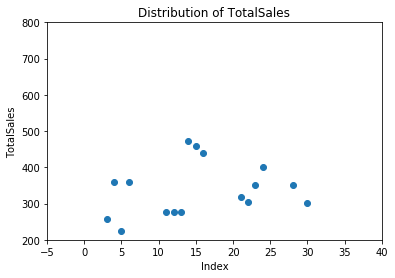

In [13]:
plt.scatter(x=stores.index, y=stores.TotalSales)
plt.xlabel("Index")
plt.ylabel("TotalSales")
plt.title("Distribution of TotalSales")
plt.xlim(-5,40) #changes end point values 
plt.ylim(200,800) #changes end point values

In [16]:
np.arange(-10,40,5) #creates range of nos with increment

array([-10,  -5,   0,   5,  10,  15,  20,  25,  30,  35])

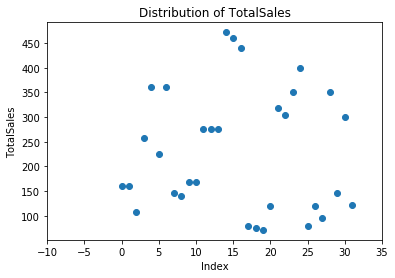

In [20]:
plt.scatter(x=x,y=y)
plt.xlabel("Index")
plt.ylabel("TotalSales")
plt.title("Distribution of TotalSales")
plt.xticks(np.arange(-10,40,5)) #changes end point values and gives increment also
plt.show()

In [2]:
import numpy as np
sizes = list(np.random.randint(300,800,32))
sizes

[521,
 300,
 686,
 465,
 773,
 649,
 626,
 448,
 778,
 588,
 363,
 574,
 501,
 365,
 370,
 748,
 376,
 468,
 640,
 426,
 727,
 403,
 717,
 678,
 465,
 791,
 741,
 787,
 782,
 373,
 571,
 523]

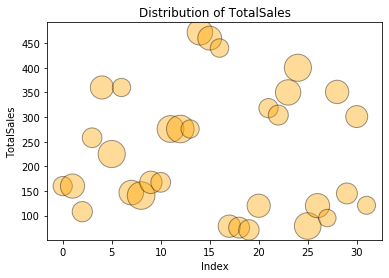

In [35]:
plt.scatter(x=x,y=y,marker="o",s=sizes,c="orange",edgecolors="black",alpha = .4)
# Args
# 1. marker =
#          "o"      :    default
#          "+"      :    cross
#          "^"      :    triangles
#          "*"      :    stars
# 2. s = size
#         one value   : simply changes the size of the markers
#         list of values  : each and evey marker will get a specific size
# 3. alpha
# 4. c = color and edgecolor = border

plt.xlabel("Index")
plt.ylabel("TotalSales")
plt.title("Distribution of TotalSales")
plt.show()

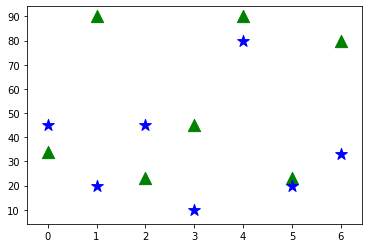

In [36]:
# two variables - univariate scatterplot but super-imposed on one another
qtr1 = [34,90,23,45,90,23,80]
qtr2 = [45,20,45,10,80,20,33]

ix = list(range(0,len(qtr1)))

plt.scatter(x=ix,y=qtr1,marker = "^", c = "green", s = 150)
plt.scatter(x=ix,y=qtr2,marker = "*", c = "blue", s = 150)
plt.show()

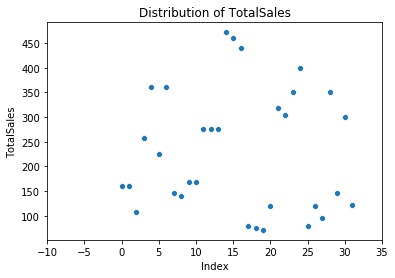

In [41]:
# 2. seaborn
sns.scatterplot(x=x,y=y)
plt.xlabel("Index")
plt.ylabel("TotalSales")
plt.title("Distribution of TotalSales")
plt.xticks(np.arange(-10,40,5))
plt.show()

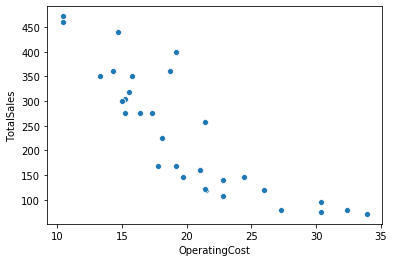

In [50]:
sns.scatterplot(x="OperatingCost", y = "TotalSales", data = stores)

In [44]:
stores.head()

,StoreCode,StoreName,StoreType,Location,OperatingCost,Staff_Cnt,TotalSales,Total_Customers,AcqCostPercust,BasketSize,ProfitPercust,OwnStore,OnlinePresence,Tenure,StoreSegment
0,STR101,Electronics Zone,Electronincs,Delhi,21.0,60,160.0,110,3.90,2.620,16.46,0,1,4,4
1,STR102,Apparel Zone,Apparel,Delhi,21.0,60,160.0,110,3.90,2.875,17.02,0,1,4,4
2,STR103,Super Bazar,Super Market,Delhi,22.8,40,108.0,93,3.85,2.320,18.61,1,1,4,1
3,STR104,Super Market,Super Market,Delhi,21.4,60,258.0,110,3.08,3.215,19.44,1,0,3,1
4,STR105,Central Store,Super Market,Delhi,18.7,80,360.0,175,3.15,3.440,17.02,0,0,3,2


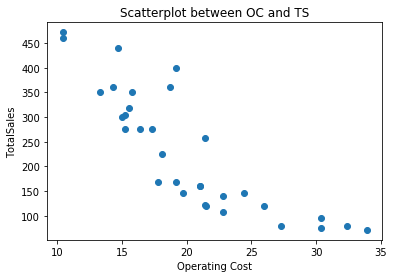

In [45]:
# two variable scatter plot
plt.scatter(x=stores.OperatingCost,y=stores.TotalSales)
plt.xlabel("Operating Cost")
plt.ylabel("TotalSales")
plt.title("Scatterplot between OC and TS")
plt.show()

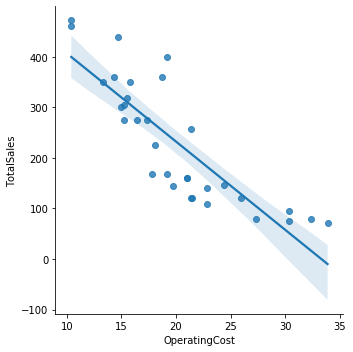

In [48]:
# 2. Using seaborn
# sns.lmplot()
# lm -> linear modelling
#   y = mx + C

sns.lmplot(x="OperatingCost", y = "TotalSales", data = stores)
plt.show()

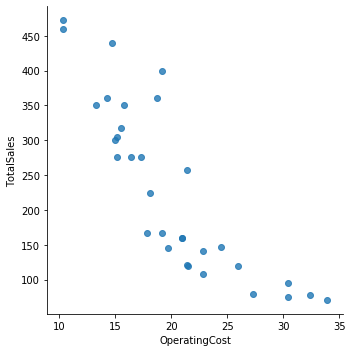

In [49]:
sns.lmplot(x="OperatingCost", y = "TotalSales", data = stores,fit_reg=False) #not having the line
plt.show()

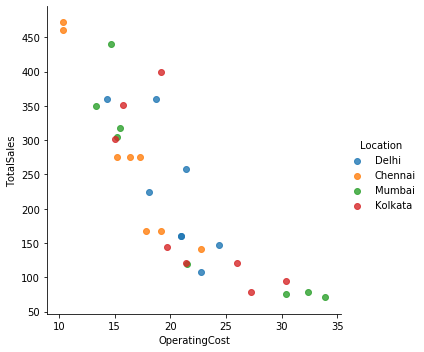

In [57]:
# 2. Using seaborn
# sns.lmplot()
# lm -> linear modelling
#   y = mx + C

# add a 3rd variable  --- categorical variable
#     hue = "" (adds color automatically)

# palatte = ["mistyrose2","orange2","slategray2","sienna3"]
# the no of colors passed should be same as the no of categories of the cat variable

sns.lmplot("OperatingCost", y = "TotalSales", hue = "Location",data = stores,fit_reg=False)
plt.show()

https://seaborn.pydata.org/

---


for colors http://www.stat.columbia.edu/~tzheng/files/Rcolor.pdf

In [31]:
# Bargraphs
# frequency bars

res1 = stores.groupby(by="StoreType")[["StoreType"]].count().add_prefix("CountOf_")
display(res1)
res2 = res1.reset_index()
display(res2)

,CountOf_StoreType
StoreType,
Apparel,12
Electronincs,8
Super Market,12


,StoreType,CountOf_StoreType
0,Apparel,12
1,Electronincs,8
2,Super Market,12


for colors http://www.stat.columbia.edu/~tzheng/files/Rcolor.pdf

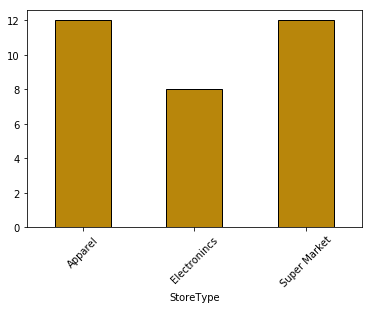

In [178]:
# 1. Frequecny bars
# 1.1 using pandas 

# for .plot the suitable dataset here is res1

# kind = "bar"
# legend = False or plt.legend("") to remove main title

res1.plot(kind="bar", legend = False, color = "darkgoldenrod", edgecolor="black")
#plt.legend("") 
plt.xticks(rotation=45)
plt.show()

<BarContainer object of 3 artists>

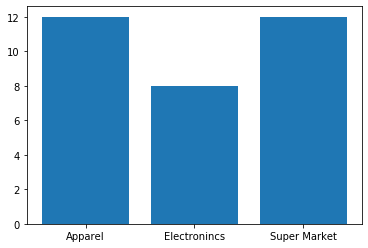

In [6]:
# for plt.bar, the suitable input is res2 not res1
plt.bar(x = res2.StoreType, height = res2.CountOf_StoreType)  # we don't have y = "", we have height = ""

In [32]:
res2

,StoreType,CountOf_StoreType
0,Apparel,12
1,Electronincs,8
2,Super Market,12


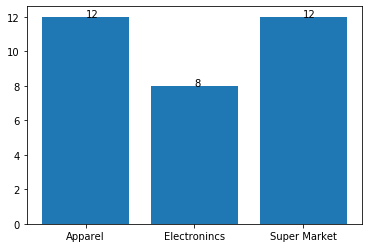

In [13]:
# 1.2 plt.bar()

plt.bar(x = res2.StoreType, height = res2.CountOf_StoreType) 
# also, add labels on top of the bars

#plt.text(x=0,y=12,s=12)        # s = str or the text
#plt.text(x=1,y=8,s=8)
#plt.text(x=2,y=12,s=12)

# OR

# x=0                                                   # FOR LOOP
# for y_axis in res2.CountOf_StoreType:
#     plt.text(x=x,y=y_axis,s=str(y_axis))
#     x += 1

# OR

for x,y_axis in enumerate(res2.CountOf_StoreType):  #enumerate gives both value plus index
    plt.text(x=x,y=y_axis,s=str(y_axis))

plt.show()
 

In [33]:
# Multivariate bargraphs
res1 = stores.groupby(by=["Location","StoreType"])[["TotalSales"]].sum().add_prefix("SumOf_")
res2 = res1.reset_index()

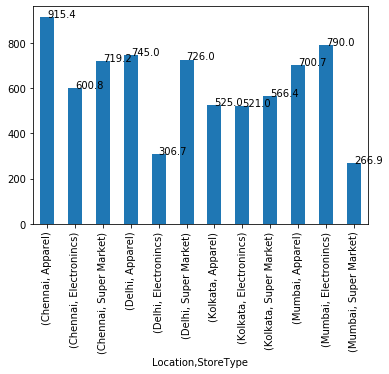

In [34]:
# 1. .plot()
res1.plot(kind="bar",legend=False)
for x,y_axis in enumerate(res1.SumOf_TotalSales):
    plt.text(x=x,y=y_axis,s=str(y_axis))
plt.show()

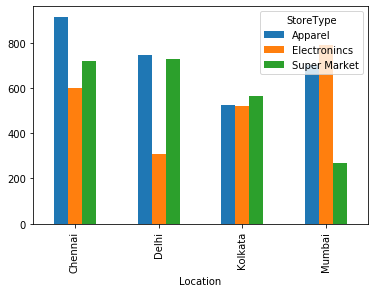

In [35]:
# 2. using .plot but on the wide format data
# Dodged bar plot
res2_wide = res2.pivot_table(index="Location",columns="StoreType",values="SumOf_TotalSales")
res2_wide.plot(kind="bar")

In [37]:
res2

,Location,StoreType,SumOf_TotalSales
0,Chennai,Apparel,915.4
1,Chennai,Electronincs,600.8
2,Chennai,Super Market,719.2
3,Delhi,Apparel,745.0
4,Delhi,Electronincs,306.7
5,Delhi,Super Market,726.0
6,Kolkata,Apparel,525.0
7,Kolkata,Electronincs,521.0
8,Kolkata,Super Market,566.4
9,Mumbai,Apparel,700.7


Text(0.85, 1777.7, '726.0')

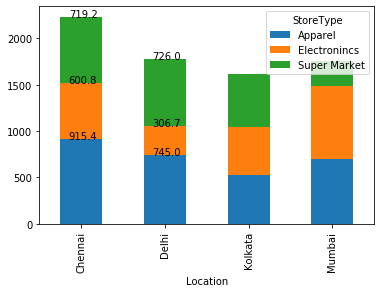

In [48]:
## stacked bar plot
res2_wide = res2.pivot_table(index="Location",columns="StoreType",values="SumOf_TotalSales")
res2_wide.plot(kind="bar",stacked=True)

plt.text(x=-0.15,y=915.4,s="915.4")
plt.text(x=-0.15,y=915.4+600.8,s="600.8")
plt.text(x=-0.15,y=915.4+600.8+719.2,s="719.2")

plt.text(x=0.85,y=745.0,s="745.0")
plt.text(x=0.85,y=745.0+306.7,s="306.7")
plt.text(x=0.85,y=745.0+306.7+726.0,s="726.0")

In [49]:
# pie charts
# frequency pie

res1 = stores.groupby(by="StoreType")[["StoreType"]].count().add_prefix("CountOf_")
display(res1)
res2 = res1.reset_index()
display(res2)

,CountOf_StoreType
StoreType,
Apparel,12
Electronincs,8
Super Market,12


,StoreType,CountOf_StoreType
0,Apparel,12
1,Electronincs,8
2,Super Market,12


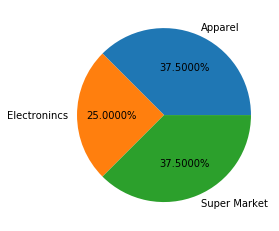

In [51]:
res1.plot(kind="pie",subplots=True, legend=False, autopct = "%.4f%%")
plt.ylabel("")
plt.show()

# autopct = "%.2f%%"  (automatically gives percentage)
# %          %
#      .2 : no of decimal points
#      f : floating point
#       % : the % symbol

In [52]:
# Multivariate pie charts
res1 = stores.groupby(by=["Location","StoreType"])[["TotalSales"]].sum().add_prefix("SumOf_")
res2 = res1.reset_index()


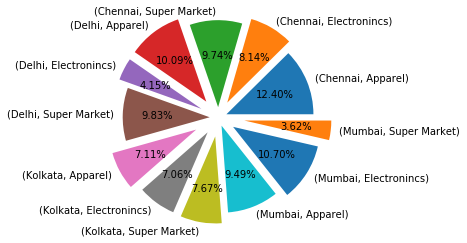

In [74]:
res1.plot(kind="pie",subplots=True,legend=False, autopct="%.2f%%",
          explode=[0.1,0.2,0.12,0.23,0.22,0.1,0.29,0.21,0.22,0.1,0.2,0.3])  # breaks pie
plt.ylabel("")
plt.show()

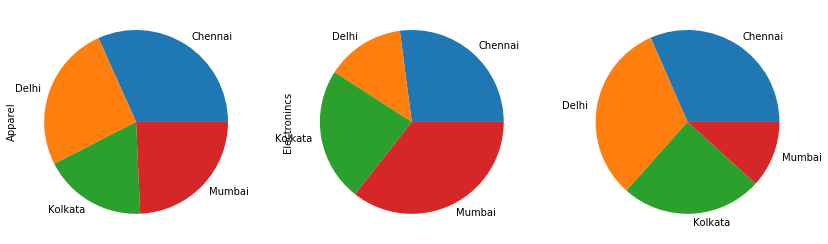

In [75]:
# .plot() for wide format data
res2_wide = res2.pivot_table(index="Location",columns="StoreType",values="SumOf_TotalSales")
res2_wide.plot(kind="pie",subplots=True,legend=False,figsize = (14,5))  #figszie gives you to adjust size
plt.ylabel("")
plt.show()